## Kaggle API Connect

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:03<00:00, 254MB/s]
100% 1.06G/1.06G [00:03<00:00, 315MB/s]


In [ ]:
!unzip /content/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

## Libraries Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import imghdr
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras import layers,models
from keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

## Function of See the random img in the dataset
- User should provide :
    - the path of dir
    - the class name ('dog','cat')
    - number of image default is 9.

In [ ]:
def plt_img(dir,cls,num_img=9): #default images is 9 but you can increase that
  img_file = os.listdir(dir)# for the extract the names of the image in dir
  if len(img_file)<num_img:# if the user value is more then the dir images
    print("Only few images in the dir")
    num_img = len(img_file)# num of images change

  selected = random.sample(img_file,num_img)# pic up random images

  fig,ax = plt.subplots(3,3,figsize=(6,6))# ploting image size
  ax = ax.ravel()# ravel for convert 2d to 1d axis that is reduce the complaxcity

  for i,img_file in enumerate(selected):# enumerate for the indexing values
    img_path = os.path.join(dir,img_file)# join the dir and image name that is return the path of the image
    image = load_img(img_path)# for load the img
    ax[i].imshow(image)# show in the plot
    ax[i].axis('off')# axis is off
    ax[i].set_title(cls)# for title
plt.show()# for remove the unnecessary info or warnings

## Directory Assign in variable

In [ ]:
dog = '/content/dogs_vs_cats/train/dogs'
cat = '/content/dogs_vs_cats/train/cats'

## Image plot by the plt_img function

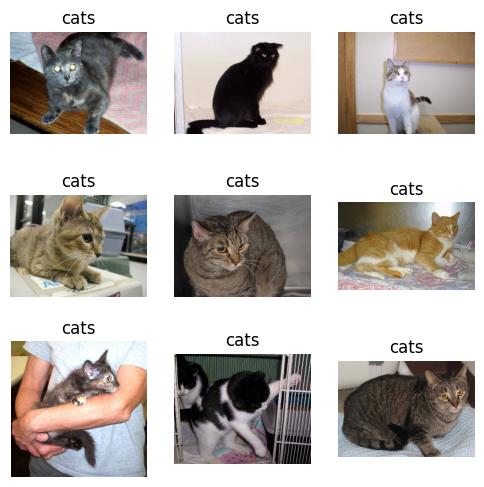

In [ ]:
plt_img(cat,'cats')# function call

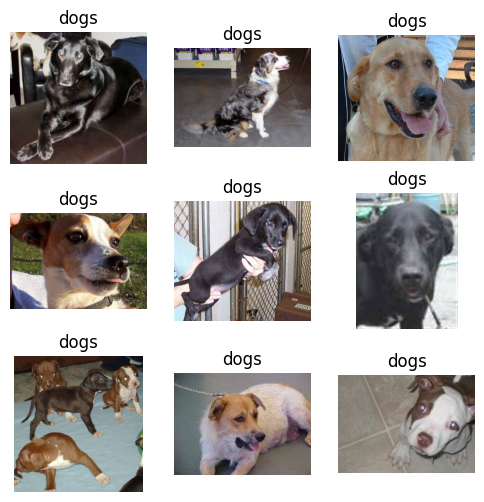

In [ ]:
plt_img(dog,'dogs')# function call

In [ ]:
c_train = os.listdir(cat)
d_train = os.listdir(dog)
c_test = os.listdir('/content/dogs_vs_cats/test/cats')
d_test = os.listdir('/content/dogs_vs_cats/test/dogs')

## This for loop is check the images are in this formate(extention) :
  - jpeg
  - jpg
  - png
  
  if image is not in the list that is removed by the loop and if image is currupted that images also removed by the loop

In [ ]:
img_ext = ['jpeg','jpg','png']# image having only this formate
data_dir = '/content/dogs_vs_cats'# data images

for root,dir,files in os.walk(data_dir):# os.walk function is the walk around the all data in this file
  for file in files:
    file_path = os.path.join(root,file)# join method is join the root and image to make the img path
    try:
      file_type = imghdr.what(file_path)# imghdr.what function recognize the image formate(extention)
      if file_type not in img_ext:
        print('Img not in ext....')
        os.remove(file_path)# os.remove is remove the image in the dataset
    except Exception as e:# if image is currupted that it will show the error but after execution
      print("invalid img....")
      os.remove(file_path)

## This function made for convert img to array it will take the path of image

In [ ]:
def img_to_array(img_path):
  try:
    with Image.open(img_path) as img:# with is open the img
      img_array = np.array(img)# np.array is convert the img into array
      return img_array
  except Exception as e:
    print(e)

array([[[ 50,  72,  95],
        [ 52,  74,  97],
        [ 29,  51,  75],
        ...,
        [208, 197,  56],
        [197, 186,  44],
        [175, 164,  22]],

       [[ 68,  90, 113],
        [ 77,  99, 122],
        [ 61,  83, 107],
        ...,
        [202, 190,  44],
        [203, 188,  43],
        [169, 157,  11]],

       [[ 51,  75,  99],
        [ 67,  91, 115],
        [ 91, 113, 137],
        ...,
        [172, 156,   1],
        [191, 172,  18],
        [207, 191,  36]],

       ...,

       [[133, 156, 104],
        [139, 163, 111],
        [103, 130,  77],
        ...,
        [ 94, 109,  66],
        [ 98, 114,  69],
        [ 92, 109,  64]],

       [[125, 152, 101],
        [105, 133,  82],
        [ 77, 109,  59],
        ...,
        [ 71,  83,  43],
        [ 98, 113,  70],
        [105, 120,  77]],

       [[121, 148,  97],
        [ 72, 100,  49],
        [ 58,  90,  40],
        ...,
        [ 72,  84,  44],
        [ 98, 113,  70],
        [ 89, 104,  61]]], dtype=uint8)
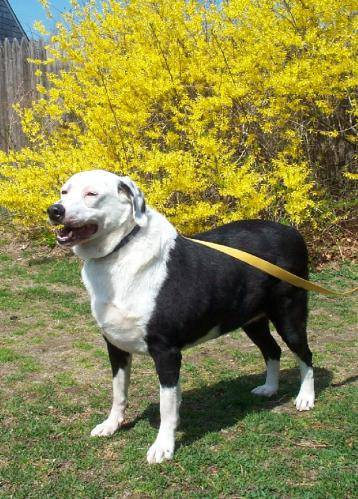

In [ ]:
img_to_array('/content/dogs_vs_cats/test/dogs/dog.11172.jpg')# funtion call

## CV2 that is Computer Vision that is doing same thing also provide the shape and img in array form

In [ ]:
image ='/content/dogs_vs_cats/test/cats/cat.10017.jpg'
img = cv2.imread(image)# cv2 is the computer vision 2 that also provide shape and img in array form
if img is not None:
  print(img)
  print(img.shape)
else:
  print("image cannot be loaded")

[[[138 148 158]
  [139 149 159]
  [140 150 160]
  ...
  [186 187 185]
  [203 204 202]
  [223 224 222]]

 [[139 149 159]
  [140 150 160]
  [141 151 161]
  ...
  [185 186 184]
  [201 202 200]
  [223 224 222]]

 [[140 150 160]
  [141 151 161]
  [142 152 162]
  ...
  [184 182 181]
  [202 200 199]
  [223 221 220]]

 ...

 [[ 74  77  75]
  [ 73  76  74]
  [ 71  74  72]
  ...
  [114 133 138]
  [113 129 135]
  [115 134 139]]

 [[ 69  72  70]
  [ 68  71  69]
  [ 66  69  67]
  ...
  [103 123 128]
  [ 98 117 122]
  [102 122 127]]

 [[ 68  71  69]
  [ 68  71  69]
  [ 66  69  67]
  ...
  [100 120 125]
  [ 92 112 117]
  [ 98 118 123]]]
(280, 500, 3)


array([[[138, 148, 158],
        [139, 149, 159],
        [140, 150, 160],
        ...,
        [186, 187, 185],
        [203, 204, 202],
        [223, 224, 222]],

       [[139, 149, 159],
        [140, 150, 160],
        [141, 151, 161],
        ...,
        [185, 186, 184],
        [201, 202, 200],
        [223, 224, 222]],

       [[140, 150, 160],
        [141, 151, 161],
        [142, 152, 162],
        ...,
        [184, 182, 181],
        [202, 200, 199],
        [223, 221, 220]],

       ...,

       [[ 74,  77,  75],
        [ 73,  76,  74],
        [ 71,  74,  72],
        ...,
        [114, 133, 138],
        [113, 129, 135],
        [115, 134, 139]],

       [[ 69,  72,  70],
        [ 68,  71,  69],
        [ 66,  69,  67],
        ...,
        [103, 123, 128],
        [ 98, 117, 122],
        [102, 122, 127]],

       [[ 68,  71,  69],
        [ 68,  71,  69],
        [ 66,  69,  67],
        ...,
        [100, 120, 125],
        [ 92, 112, 117],
        [ 98, 118, 123]]], dtype=uint8)
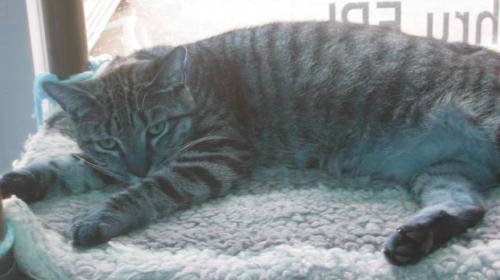

In [ ]:
img

# Img data generator is a tool that load the img and apply the preprocessing on them in trining time

In [ ]:
dir = '/content/dogs_vs_cats/train'
train_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)# this function is preprocessing the img to normalize(rescale) and split the validaton data 20%

## ImageDataGenerator to load and preprocess images from a directory (dir) and split them into training and validation sets

In [ ]:
train_gen = train_datagen.flow_from_directory(
    dir,
    target_size=(150,150),# resize each into 150x150 pixel
    batch_size=32,# batch 32 means 32 image in one batch
    class_mode='binary',# binary means two classes are there dog and cat(0,1)
    subset='training'# 80% data used in training
)
valid_gen = train_datagen.flow_from_directory(
    dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation'# 20% data used in validations
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


## This class indices means label the class the model understand which class is 0 and which class is 1 that the indicate

In [ ]:
train_classes = train_gen.class_indices
train_classes

{'cats': 0, 'dogs': 1}

## The 0 class is cats and 1 class is dogs

## This Function is plot the images from the train and validation generator

In [ ]:
def plot_img_gen(generator,num_img = 4):# generator is value that plot img from those generator and num of img is number of images that show
  imgs,labels =next(train_gen)# The next() function in Python is used to manually retrieve the next item from an iterator or generator.

  fig,axes = plt.subplots(1,num_img,figsize = (20,20))
  axes = axes.ravel()

  for img,label,ax in zip(imgs,labels,axes):# This loop is displaying a batch of images with their class labels using Matplotlib, in a grid of axes (axes).

    # for img, label, ax in zip(imgs, labels, axes):
    #   imgs: a NumPy array of image data (shape: e.g., (32, 150, 150, 3)).

    #   labels: a NumPy array of class labels (e.g., [0, 1, 0, 0, 1, ...]).

    #   axes: a list (or array) of matplotlib Axes (like subplots) where the images will be displayed.

    #   zip(...): combines one image, its label, and one axis together on each iteration.

    ax.imshow(img)# Displays the image (img) in the corresponding axis (ax) using Matplotlib.
    class_label = dict((v,k) for k,v in generator.class_indices.items())

    """   The class are in {'cats': 0, 'dogs': 1}, the model not understand the cat and dog
     for the model understanding we are swap the values of key and values that's why
     we are doing this code that's why the classes dict is this { 0 : 'cats', 1 : 'dogs' } """

    ax.axis('off')# plot img without axis
  plt.tight_layout()# that automatically adjusts the spacing between subplots to prevent overlapping content
  plt.show()# show img withou the warnings and other stuff

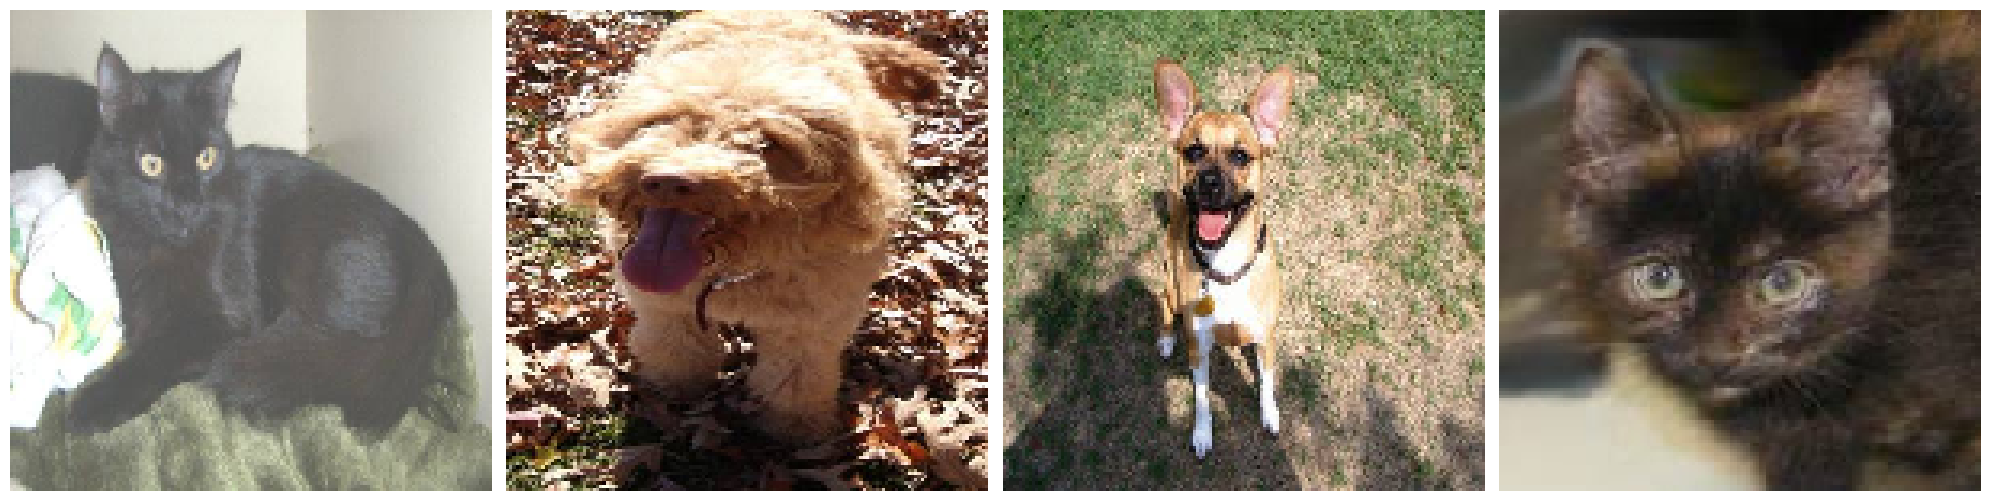

In [ ]:
plot_img_gen(valid_gen) # Function call

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3,verbose=1,restore_best_weights=True)# early stop for prevent overfitting

In [ ]:
# model making

model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),# all the convolution operation by the conv2D layer
    # that give the feature map for each input
    # 32 is the value of filters/kernals
    # (3,3) is the hight and width of the filter basically dimentions
    layers.MaxPooling2D((2,2)),# maximum pooling means take the max output of the feature map given by the convolutional layer
    # that give max values of the output and ignore small things
    # (2,2) is the size of pool
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),# flatten layer is used for flate the img, convert to the 1D tensor
    layers.Dense(256,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.2),# dropout is randomly deactivates a fraction of neurons during the training process
    layers.Dense(1,activation='sigmoid')# sigmoid activation is return the 0 or 1 value for classification 0 is cat and 1 is dog
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])# compiling the model means configuring the learning process

In [ ]:
h = model.fit(train_gen,validation_data=valid_gen,epochs=10,callbacks=[early_stopping])# train a deep learning model for a fixed number of epochs (iterations over the entire dataset)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step - accuracy: 0.5897 - loss: 0.6610 - val_accuracy: 0.7287 - val_loss: 0.5348
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.7442 - loss: 0.5183 - val_accuracy: 0.8025 - val_loss: 0.4281
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.8094 - loss: 0.4213 - val_accuracy: 0.8305 - val_loss: 0.3847
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.8436 - loss: 0.3465 - val_accuracy: 0.8493 - val_loss: 0.3448
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.8837 - loss: 0.2766 - val_accuracy: 0.8478 - val_loss: 0.3556
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.9089 - loss: 0.2230 - val_accuracy: 0.8698 - val_loss: 0.3130
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.9364 - loss: 0.1619 - val_accuracy: 0.8815 - val_loss: 0.3058
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.9581 - loss: 0.1123 - 

In [ ]:
model.summary()# gives the summary of the model

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,196,101 (42.71 MB)

 Trainable params: 3,732,033 (14.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,464,068 (28.47 MB)

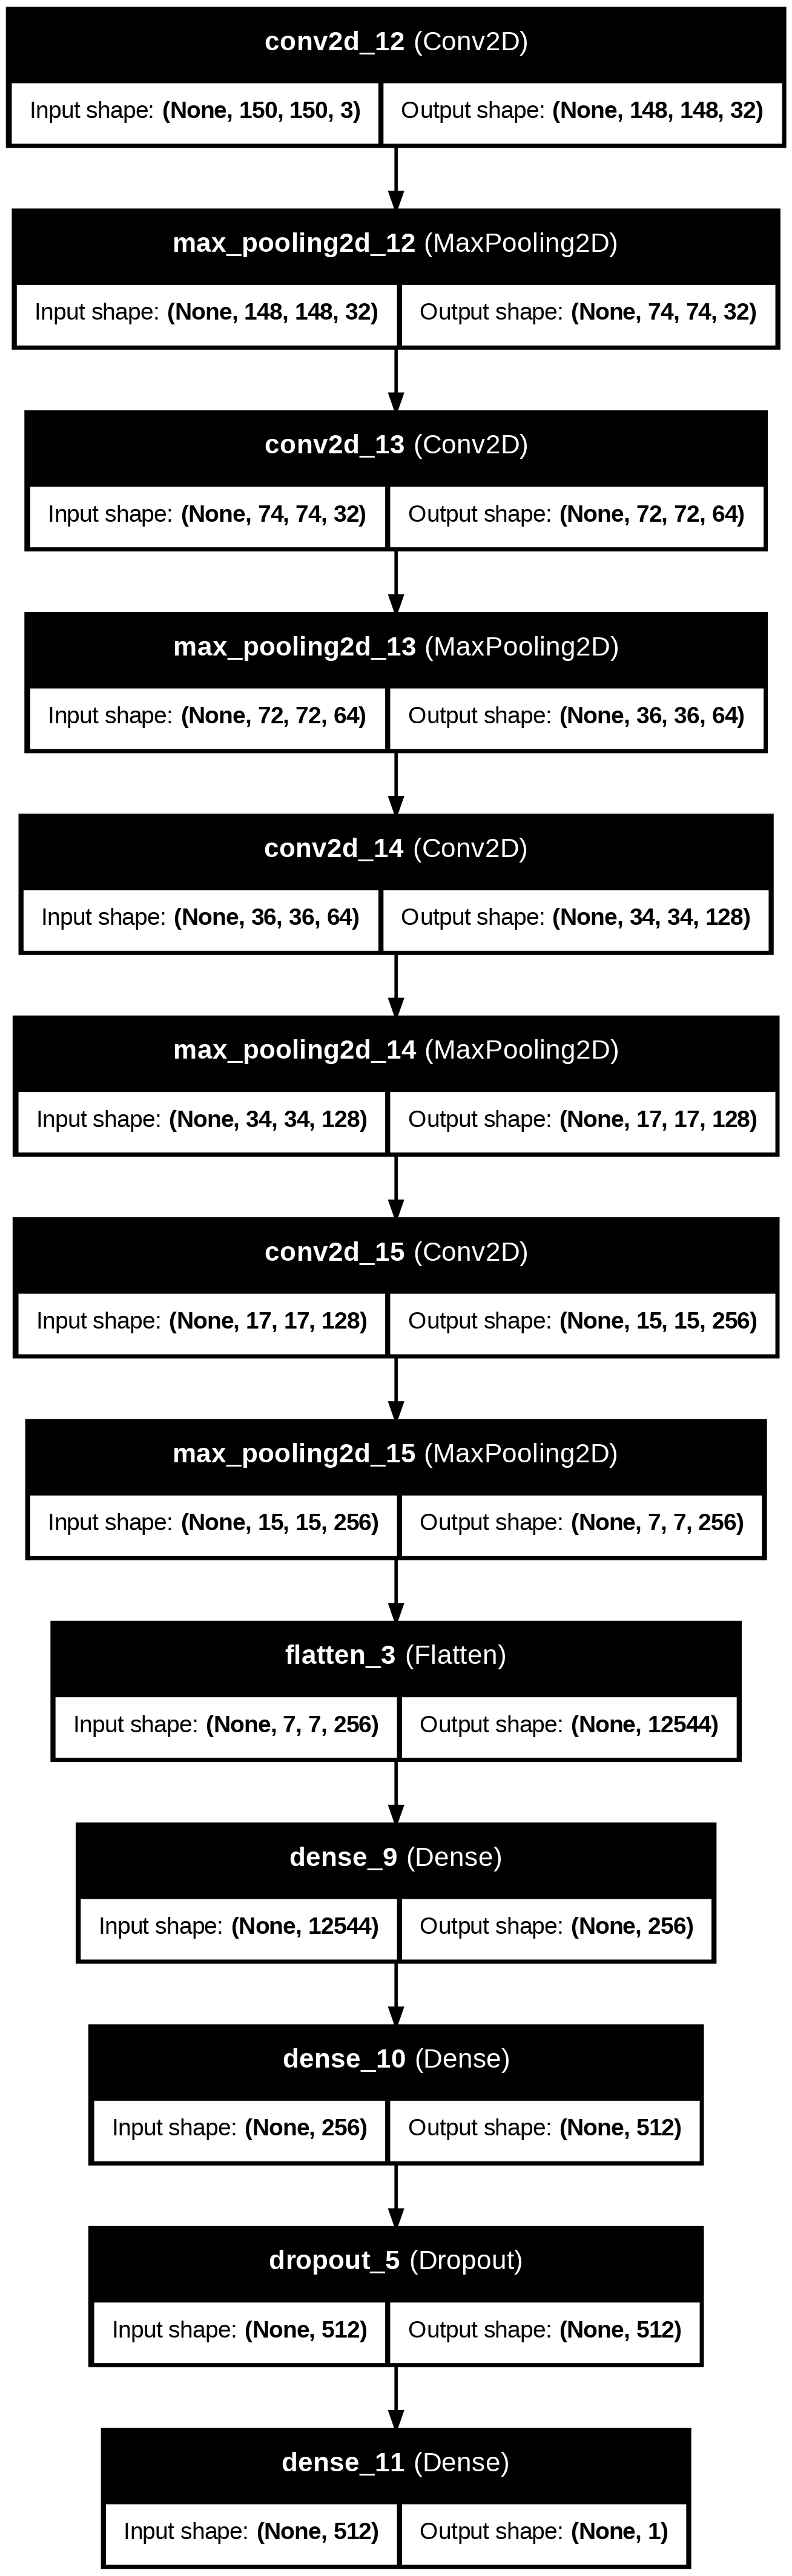

In [ ]:
plot_model(model,to_file ='CNN_architecture.png',show_shapes = True,show_layer_names = True)# make img of the model architecture

In [ ]:
loss,acc = model.evaluate(valid_gen)# predicts the output for the given input and then computes the metrics function specified in the model

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8819 - loss: 0.3080


In [ ]:
acc# accuracy of the model

0.8815000057220459

In [ ]:
loss# loss that can model doing during the prediction

0.30578699707984924

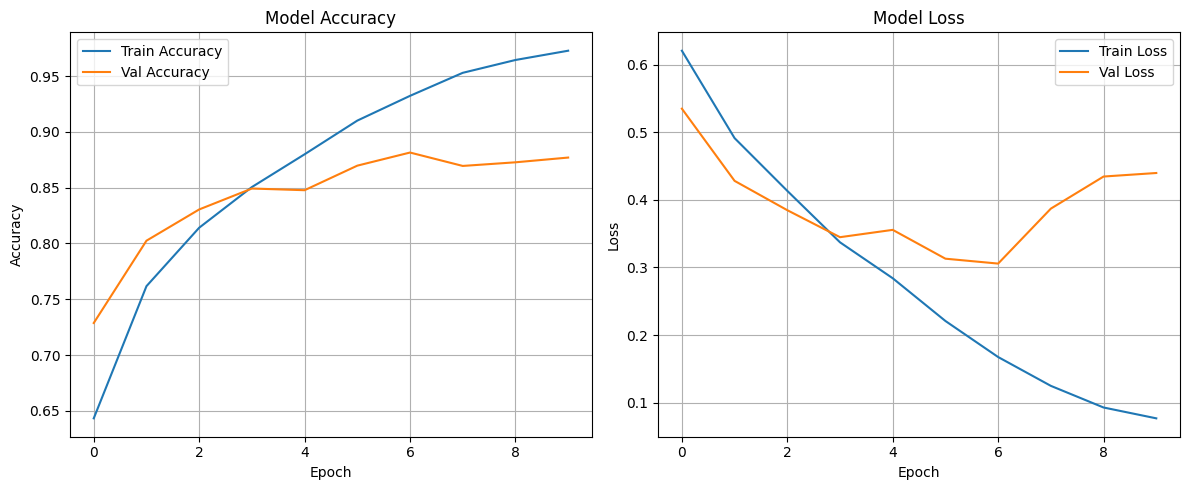

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # This controls the overall size of the figure

# Subplot for Accuracy

plt.subplot(1, 2, 1)# first subplot in a 1-row, 2-column grid at position 1
plt.plot(h.history['accuracy'], label='Train Accuracy')# Plot training accuracy from the model's history
plt.plot(h.history['val_accuracy'], label='Val Accuracy')# Plot validation accuracy from the model's history
plt.title('Model Accuracy')# Set the title of the accuracy graph
plt.xlabel('Epoch')# Label the x-axis as "Epoch"
plt.ylabel('Accuracy')# Label the y-axis as "Accuracy"
plt.legend()# Display a legend to distinguish training and validation curves
plt.grid(True)# Show a grid in the background for better readability

# Subplot for Loss

plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], label='Train Loss')# Plot training loss from the model's history
plt.plot(h.history['val_loss'], label='Val Loss')# Plot validation loss from the model's history
plt.title('Model Loss')# Set the title of the loss graph
plt.xlabel('Epoch')# Label the x-axis as "Epoch"
plt.ylabel('Loss')# Label the y-axis as "Loss"
plt.legend()# Display a legend to distinguish training and validation curves
plt.grid(True)# Show a grid in the background for better readability


plt.tight_layout()# Automatically adjust subplots to fit within the figure area without overlapping
plt.show()# Display the complete plot with both subplots
